In [1]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


# Scatterplots of indexes over time

In [2]:
import os
import sys

import pandas as pd
import seaborn as sns

# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.pardir, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport features.build_features
%aimport visualization.visualize
from visualization.visualize import biplot, plot_explained_variance, triplot

In [3]:
YEARS = [1976, 1988, 1992, 2000, 2004, 2008, 2012, 2016]

In [4]:
DATA_FRAMES_RAW = [pd.read_csv("../data/processed/{year}.csv".format(year=year), index_col=0) for year in YEARS]

In [5]:
DATA_FRAMES = [df.dropna() for df in DATA_FRAMES_RAW]

In [6]:
sns.set_palette("Set1", 10, .75)

In [7]:
from sklearn.preprocessing import minmax_scale

econs, morals, racisms, parties = [], [], [], []
for year, df in zip(YEARS, DATA_FRAMES):
    df = pd.DataFrame(minmax_scale(df, feature_range=(-1, 1)), columns=df.columns)
    econ = (df.NationalHealthInsurance + df.StandardOfLiving + df.ServicesVsSpending) / 3
    try:
        moral = (df.Abortion + df.MoralRelativism + df.MoralTolerance + df.TraditionalFamilies + df.NewerLifestyles) / 5
    except AttributeError:
        moral = df.Abortion
    try:
        racial = (df.AffirmativeAction + df.RacialDeserve + df.RacialGenerational + df.RacialTryHarder + df.RacialWorkWayUp) / 5
    except AttributeError:
        try:
            racial = (df.RacialDeserve + df.RacialGenerational + df.RacialTryHarder + df.RacialWorkWayUp) / 4
        except AttributeError:
            racial = pd.Series([0] * len(df))
    econs.append(econ)
    morals.append(moral)
    racisms.append(racial)
    parties.append(df.PartyID)
indexes = [pd.concat(x, axis=1) for x in zip(econs, morals, racisms, parties)]
for index in indexes:
    index.columns = ["Econ", "Moral", "Racial", "PartyID"]

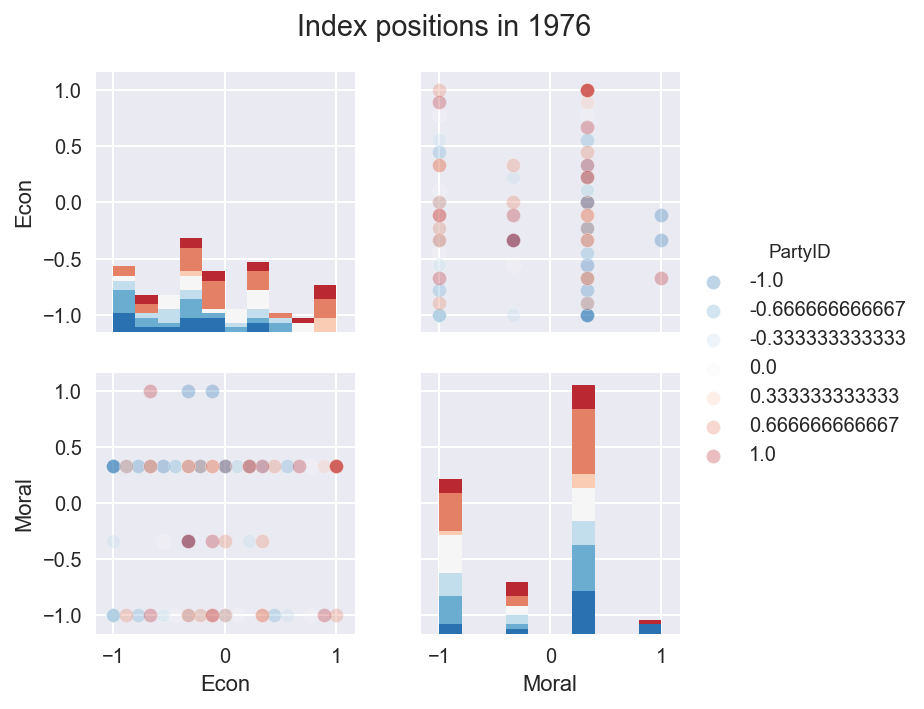

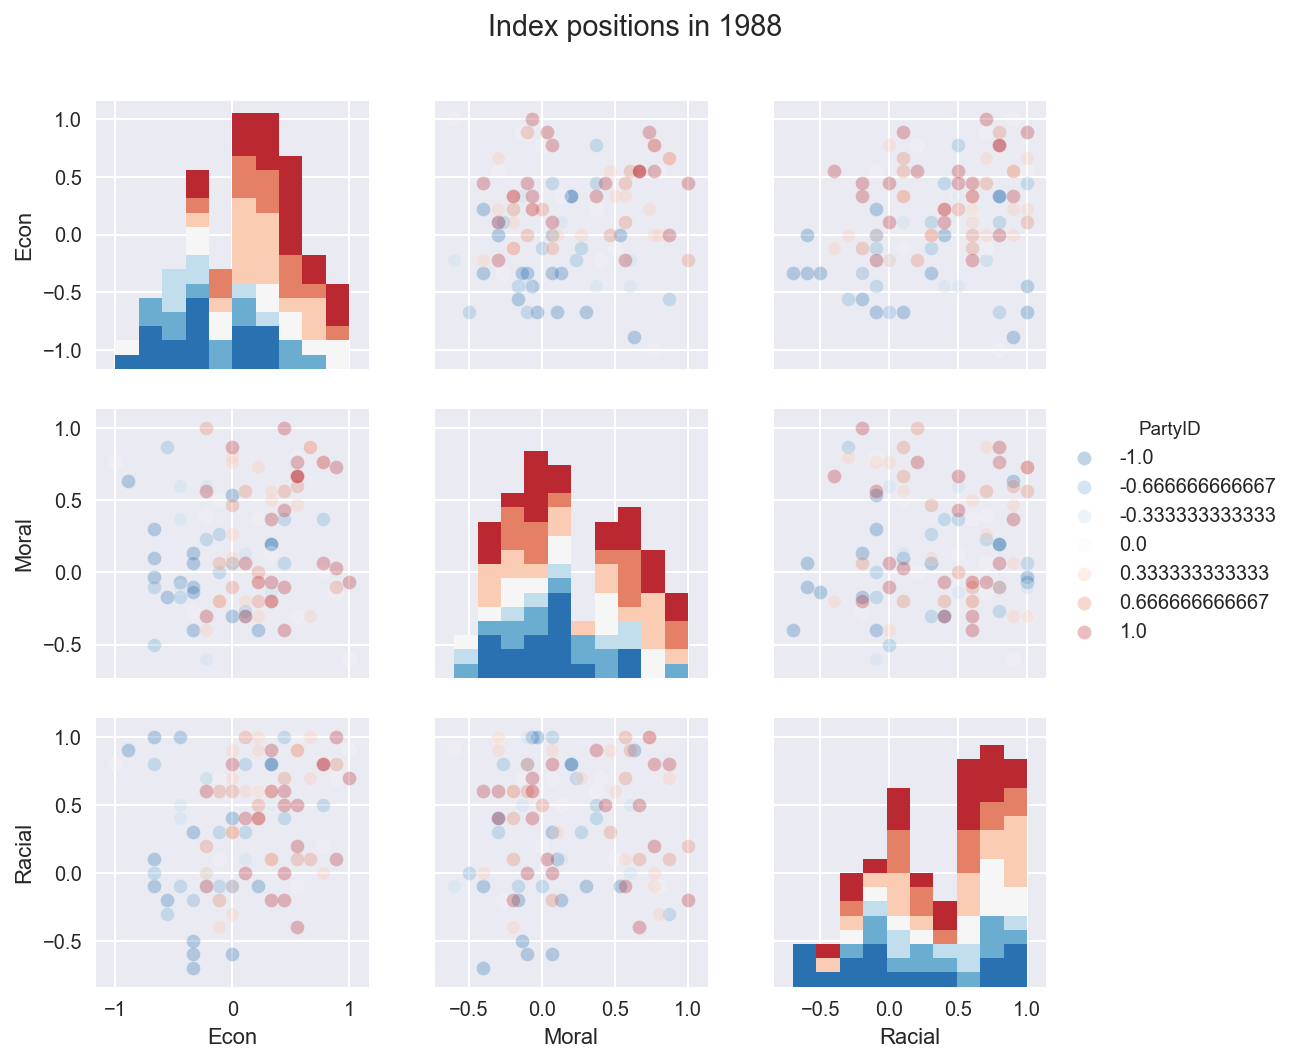

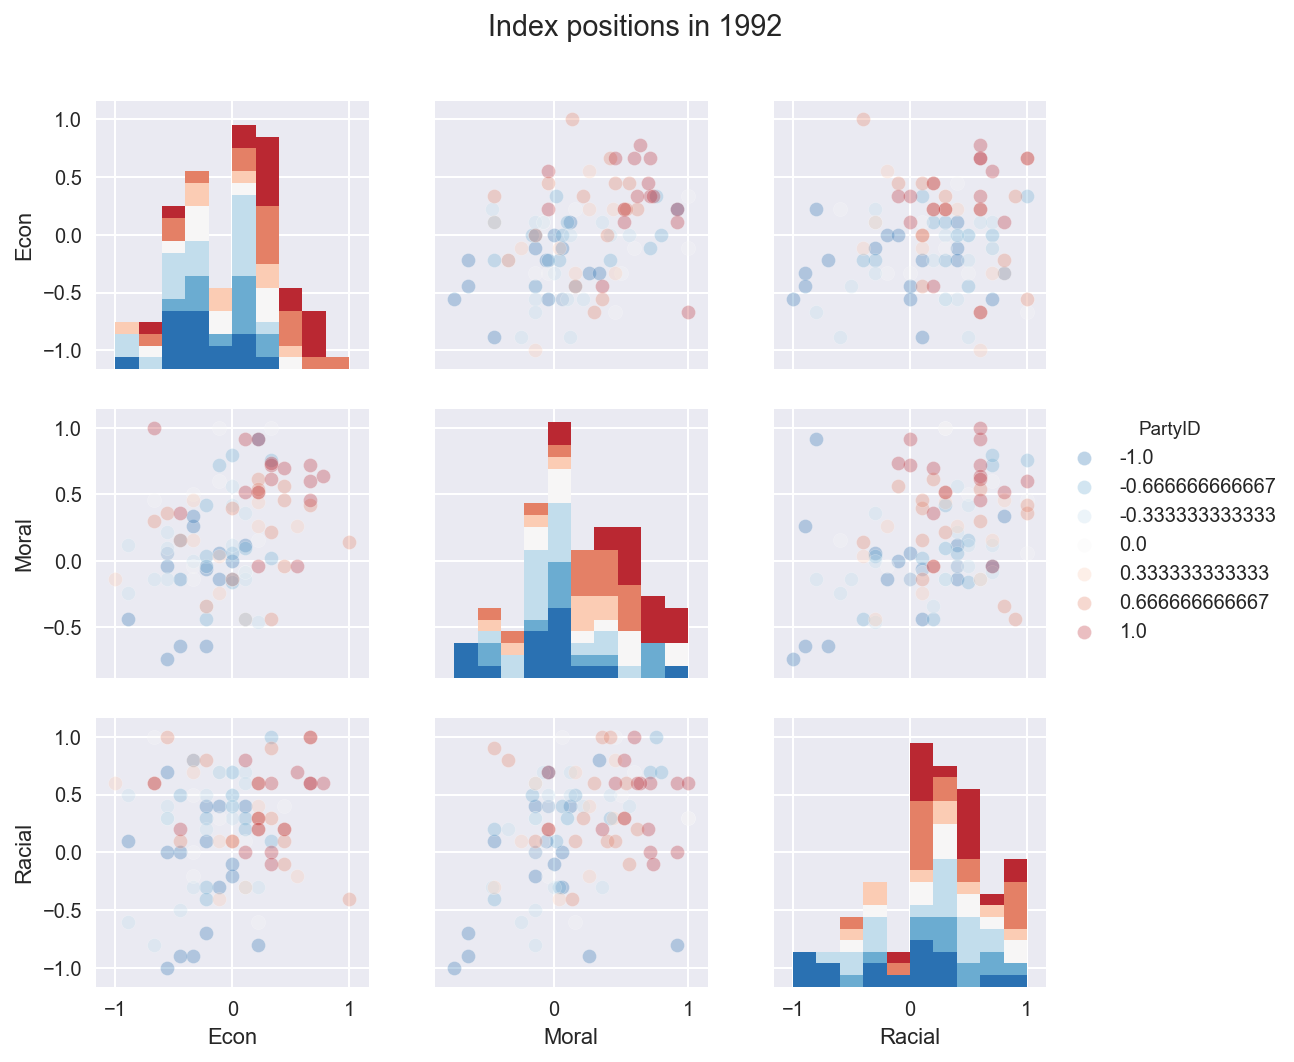

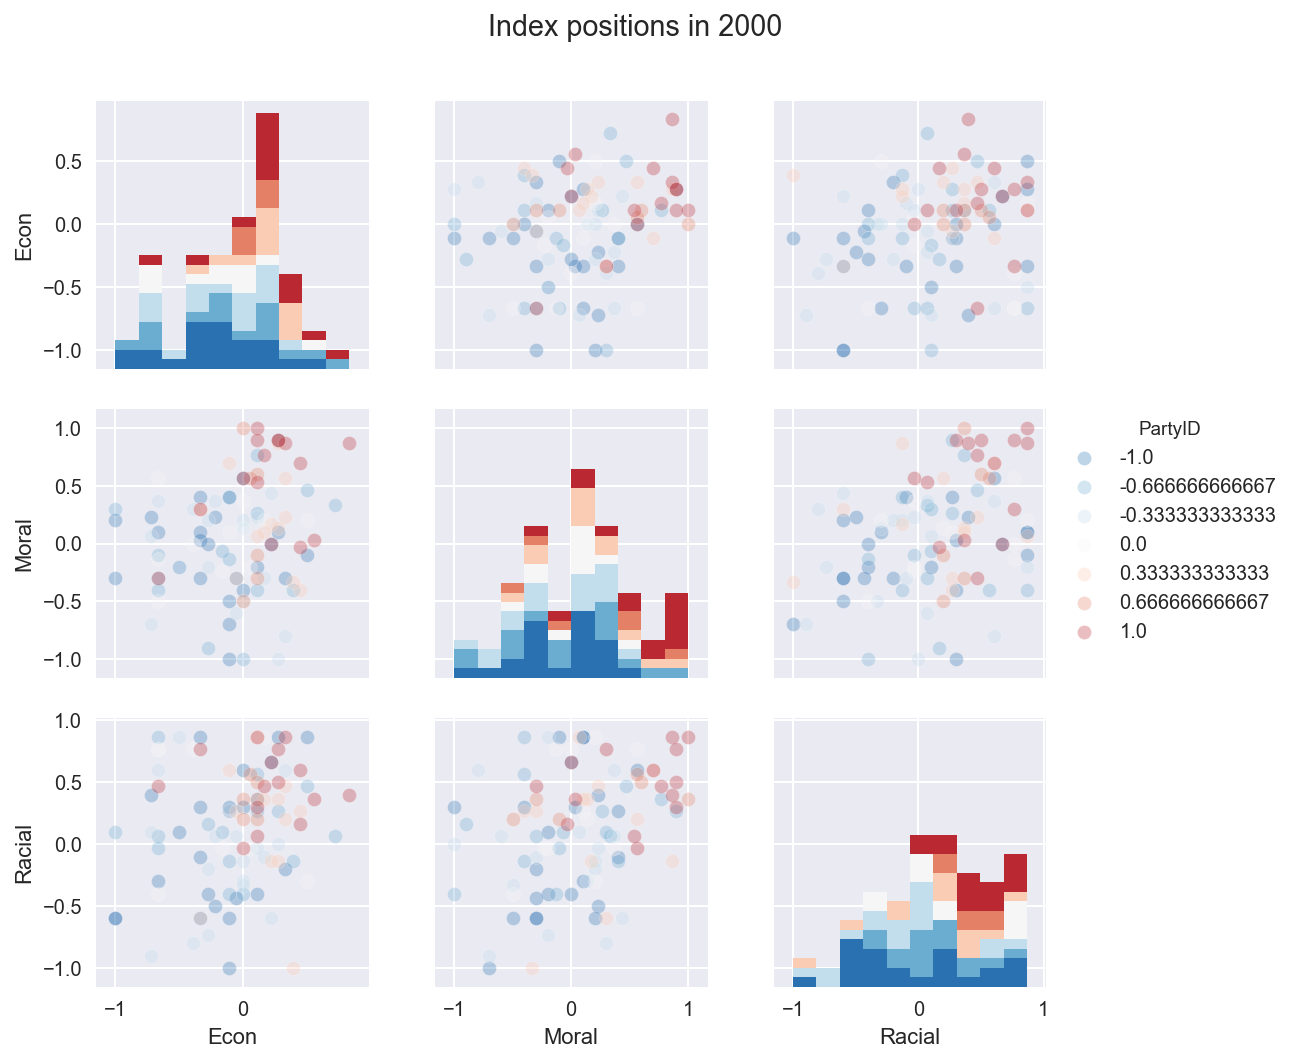

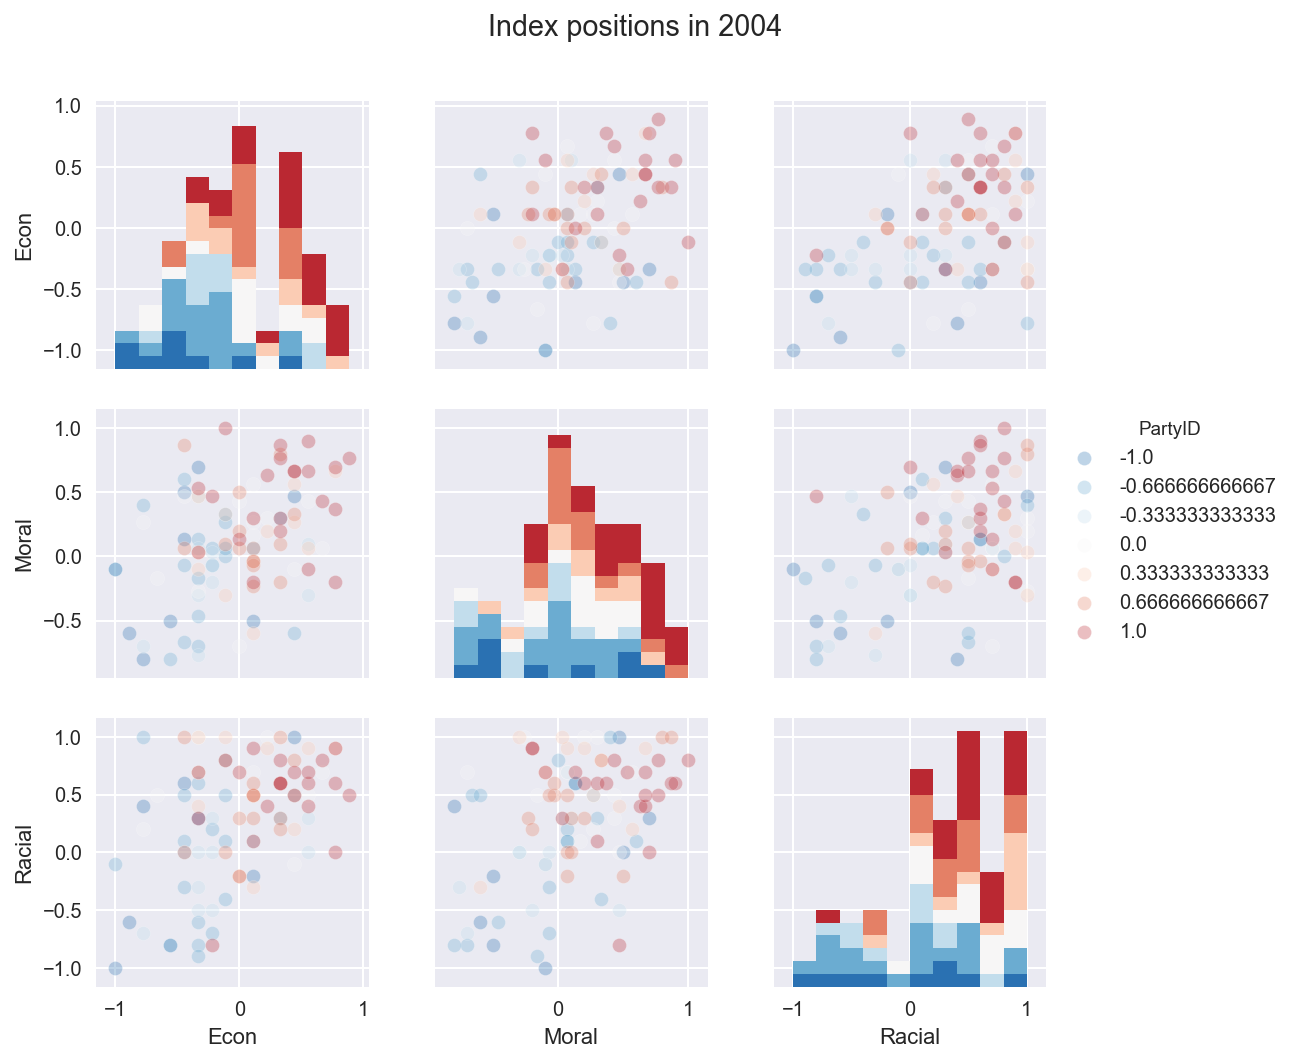

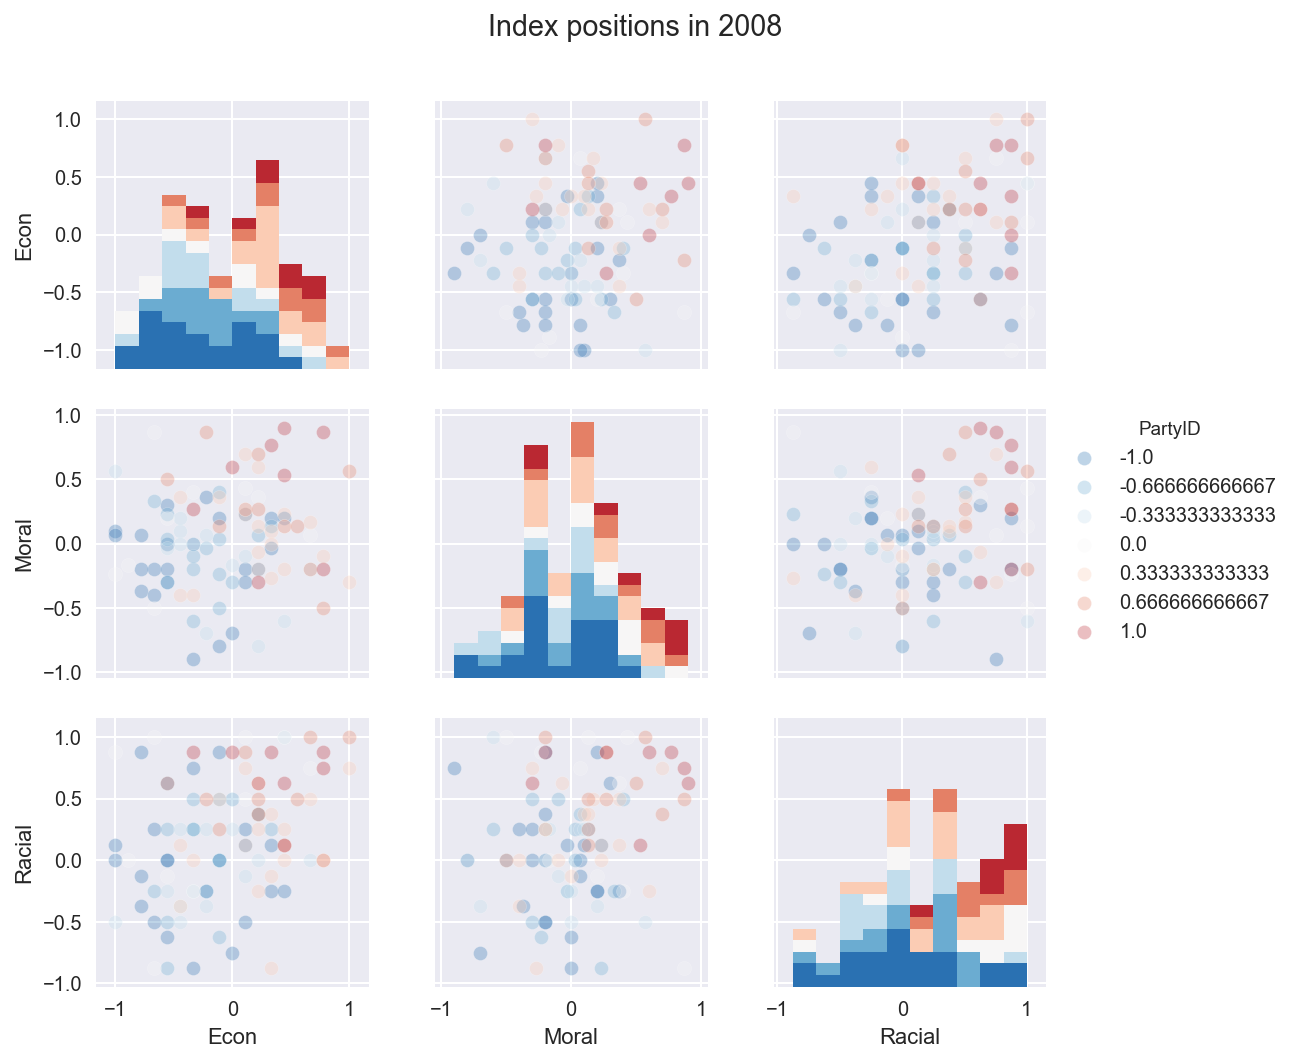

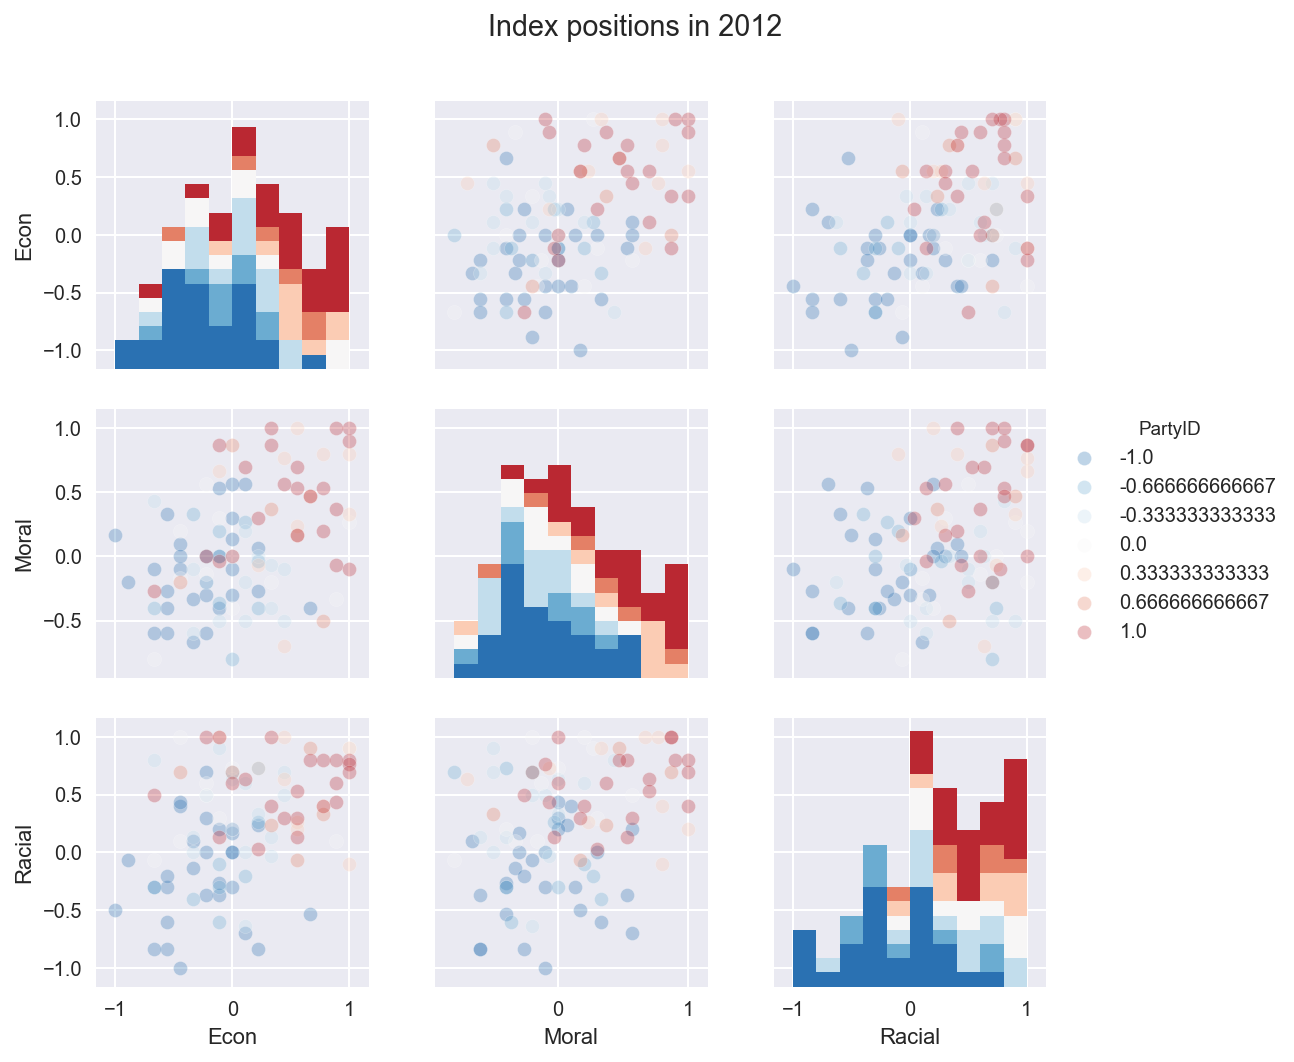

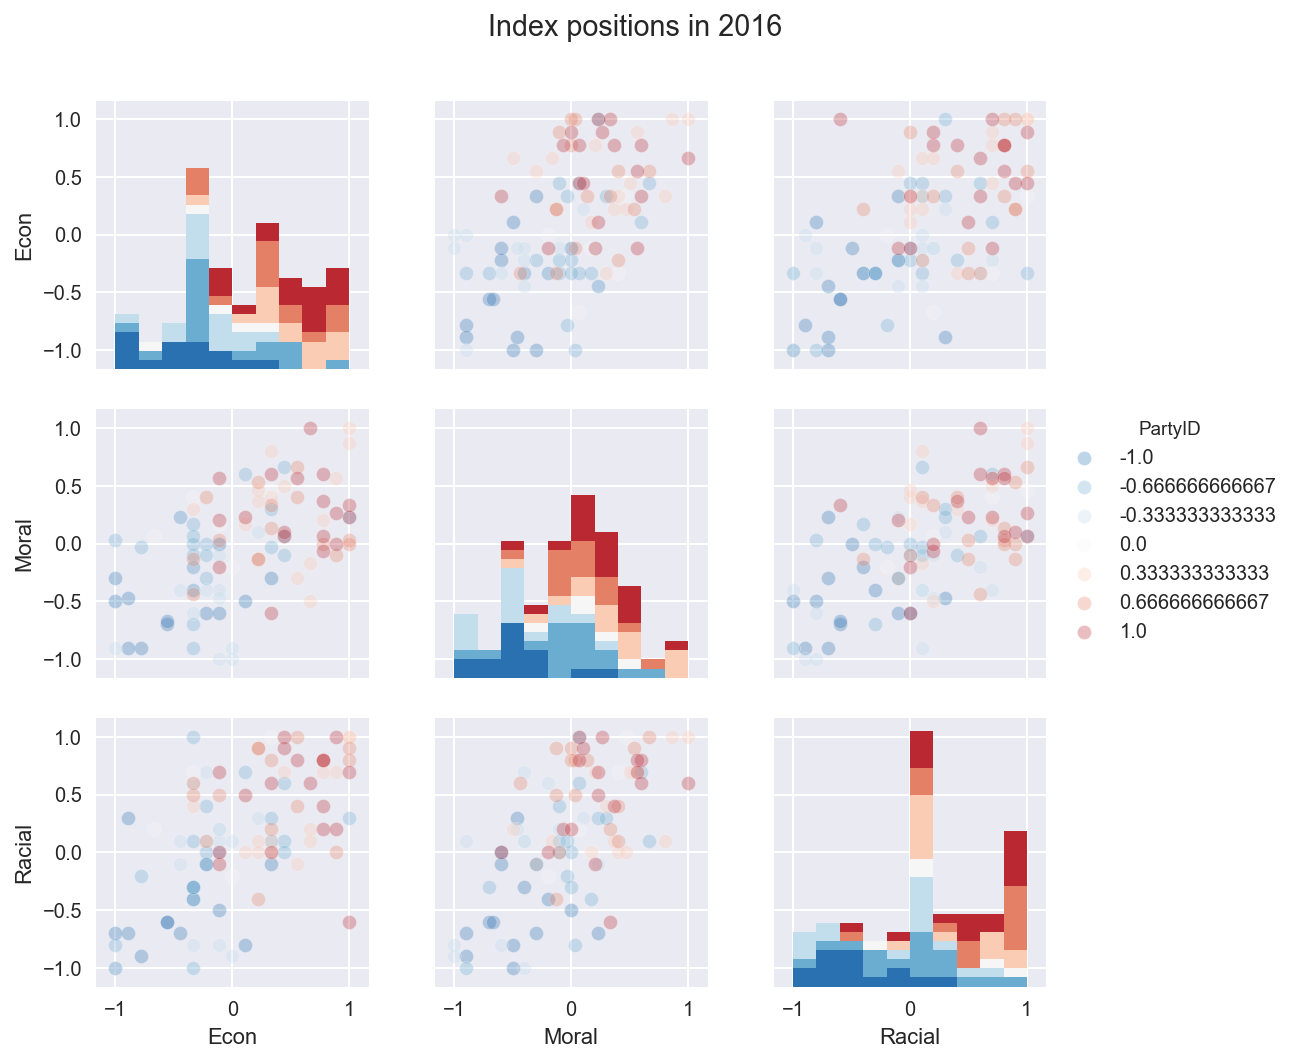

In [8]:
for year, index in zip(YEARS, indexes):
    if year == 1976:
        vars = ["Econ", "Moral"]
    else:
        vars = ["Econ", "Moral", "Racial"]
    g = sns.PairGrid(index.sample(100, random_state=1), hue="PartyID", palette=sns.color_palette("RdBu_r", 7), vars=vars)
    g.map_offdiag(plt.scatter, alpha=.3, edgecolor="white")
    g.map_diag(plt.hist)
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('Index positions in {}'.format(year))
    g.add_legend();